In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import time 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import random


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
train_path = "spliting_dataset/train"
folder_train = os.listdir(train_path)
distribution_of_train_data = {}
images_train = {}
for i in range(len(folder_train)):
    image_array=[]
    dir = os.path.join(train_path,folder_train[i])
    for file in os.listdir(dir):
        img = cv2.imread(os.path.join(dir,file),0)
#0 in the imread read image in greyscale mode
        image_array.append(img)  
    images_train[folder_train[i]] = image_array
    distribution_of_train_data[folder_train[i]] = len(os.listdir(dir))

In [4]:
test_path = "spliting_dataset/val"
folder_test = os.listdir(train_path)
distribution_of_test_data = {}
images_test = {}
for i in range(len(folder_test)):
    image_array=[]
    dir = os.path.join(test_path,folder_test[i])
    for file in os.listdir(dir):
        img = cv2.imread(os.path.join(dir,file),0)
#0 in the imread read image in greyscale mode
        image_array.append(img)  
    images_test[folder_test[i]] = image_array
    distribution_of_test_data[folder_test[i]] = len(os.listdir(dir))

In [40]:
distribution_of_train_data

{'Cheetah': 50, 'Jaguar': 50, 'Leopard': 50, 'Lion': 50, 'Tiger': 50}

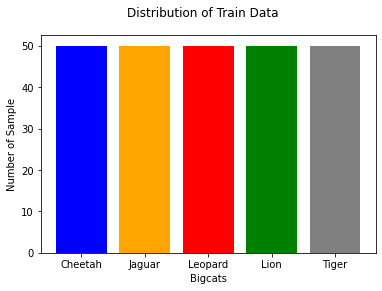

In [6]:
names = list(distribution_of_train_data.keys())
values = list(distribution_of_train_data.values())
plt.bar(range(len(distribution_of_train_data)), values, tick_label=names, color = ["blue","orange","red","green","grey"])
plt.ylabel('Number of Sample')
plt.suptitle('Distribution of Train Data')
plt.xlabel('Bigcats');
plt.rc('axes', labelsize=15)
plt.rc('figure', titlesize=20)
plt.show()

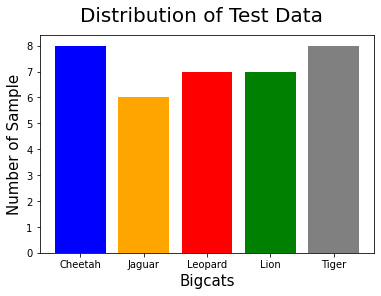

In [7]:
names = list(distribution_of_test_data.keys())
values = list(distribution_of_test_data.values())
plt.bar(range(len(distribution_of_test_data)), values, tick_label=names, color = ["blue","orange","red","green","grey"])
plt.ylabel('Number of Sample')
plt.suptitle('Distribution of Test Data')
plt.xlabel('Bigcats');
plt.rc('axes', labelsize=15)
plt.rc('figure', titlesize=20)
plt.show()

## Applying SIFT

In [8]:
def SIFT_detector(images):
    sift_vector = {}
    descriptor = []
    sift = cv2.SIFT_create()
    for category,img_list in images.items():
        features = []
        for img in img_list:
            kp,des = sift.detectAndCompute(img,None)
            descriptor.extend(des)
            features.append(des)
        sift_vector[category] = features
    return [descriptor,sift_vector]

In [9]:
sift_train = SIFT_detector(images_train)
descriptors_train = sift_train[0]
bag_of_visual_train = sift_train[1]
len(bag_of_visual_train["Cheetah"])

50

In [41]:
sift_test = SIFT_detector(images_test)
bag_of_visual_test = sift_test[1]

In [11]:
### Applying KMeans Clustering

In [12]:
def kmeans(k,descriptors):
    cluster = KMeans(n_clusters = k,n_init =10)
    cluster.fit(descriptors)
    visual_words = cluster.cluster_centers_
    labels = cluster.labels_
    return [visual_words,labels]

In [13]:
visual_words = kmeans(150,descriptors_train)

In [14]:
visual_words_center=visual_words[0]

In [15]:
print(len(visual_words_center))
#bag_of_visual.items()
visual_words_center

150


array([[ 8.56577764,  6.31075817, 17.60653281, ..., 15.4246329 ,
        16.04584957, 23.18699431],
       [27.71409675, 26.62792895, 29.75491308, ..., 26.19690098,
        17.25188964, 19.52721088],
       [16.06706114, 13.37813469, 34.13102282, ..., 16.72978304,
        23.22231615, 38.40039448],
       ...,
       [16.96654275, 41.78872367, 77.50216853, ...,  7.32465923,
         9.3547088 , 20.00495663],
       [27.59116156, 23.68968848, 14.91523787, ..., 22.53634388,
        19.90461241, 23.09273122],
       [22.10175953, 19.29706745, 15.47067449, ..., 24.00029326,
        16.48475073, 14.6941349 ]])

## Creating Histograms

In [16]:
def images_class(features,centers):
    dict_features = {}
    for category,img_list in features.items():
        img_class = []
        for img in img_list:
            histogram = np.zeros((1,len(centers)))
            for each_feature in img:
                diff = np.tile(each_feature, (len(centers), 1)) - centers
                dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
                idx_dist = dist.argsort()
                idx = idx_dist[0]
                #print(idx)
                #break
                histogram[0][idx] += 1
            img_class.append(histogram)
        dict_features[category]= img_class
    return dict_features

In [17]:
bag_of_visual_words = images_class(bag_of_visual_train,visual_words_center)

In [18]:
bag_of_visual_words_test = images_class(bag_of_visual_test,visual_words_center)

In [42]:
len(bag_of_visual_words_test["Cheetah"])

8

In [43]:
print(bag_of_visual_words)

{'Cheetah': [array([[17., 32., 16., 17.,  5., 10., 24., 11., 29., 22., 12., 20.,  9.,
        13.,  5., 20., 20., 22., 13., 11., 22., 15., 16., 22.,  7., 13.,
        16., 10., 20., 16., 17., 17.,  9.,  7., 17., 11., 23.,  5., 22.,
        15., 35., 23., 19., 22., 40., 20., 19., 15., 11., 10., 19., 15.,
        25., 10., 18., 17., 14., 16., 18., 15., 21., 27., 14., 15., 25.,
        26., 13., 24., 13.,  7., 22., 25., 22., 22., 14., 18., 15.,  9.,
        22., 22., 14., 13.,  2., 17., 13.,  9., 10., 21., 25., 34., 18.,
         9., 15., 16.,  7., 38., 14., 15.,  7., 20., 37., 11., 23., 39.,
        20.,  3., 11., 23., 19., 19., 26., 16., 15., 12., 28., 19., 28.,
        25., 12., 31., 17., 13., 11., 12., 21., 27., 15., 25., 28., 16.,
         2., 33., 15., 12.,  7.,  8.,  8., 23., 20., 11.,  8., 15., 12.,
        16., 13., 24., 17., 23., 19., 21.]]), array([[19., 51., 11., 11., 17., 14.,  9.,  4., 17., 20., 14., 23.,  9.,
        16.,  5., 31., 15.,  9.,  8.,  2.,  8., 15.,  8., 17.,  6

## Preparing Dataset for clustering

#### Training Dataset

In [44]:
labels = []
train=[]
for category,img_list in bag_of_visual_words.items():
    for img in img_list:
        train.append(img)
        labels.append(category)     

In [45]:
print(len(labels))
print(len(train))

250
250


In [46]:
train = np.squeeze(train, axis = 1) 
train.shape

(250, 150)

In [47]:
train = pd.DataFrame(train)
print(train)

      0     1     2     3     4     5     6     7     8     9    ...   140  \
0    17.0  32.0  16.0  17.0   5.0  10.0  24.0  11.0  29.0  22.0  ...   8.0   
1    19.0  51.0  11.0  11.0  17.0  14.0   9.0   4.0  17.0  20.0  ...  20.0   
2    12.0   1.0   3.0  14.0   9.0  17.0   2.0  17.0   5.0   6.0  ...  10.0   
3    17.0  42.0  28.0  23.0  20.0  25.0  20.0  25.0  16.0  27.0  ...  15.0   
4    22.0  29.0  16.0  20.0  11.0  10.0  32.0  12.0  33.0  30.0  ...   9.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
245  23.0   3.0  11.0  11.0  15.0  19.0  46.0   4.0  46.0  19.0  ...  20.0   
246  14.0   4.0  22.0  10.0  13.0  17.0  13.0   9.0   8.0  14.0  ...  13.0   
247  22.0   3.0   2.0  23.0  16.0  27.0  19.0  22.0  10.0  17.0  ...  22.0   
248  15.0   3.0   8.0  28.0  14.0  13.0   9.0  20.0   7.0  13.0  ...  19.0   
249   7.0   0.0   3.0  22.0   7.0  18.0   6.0  15.0   2.0  10.0  ...  11.0   

      141   142   143   144   145   146   147   148   149  
0  

In [48]:
## Since each descriptor value is assigned to one of the cluster of the Kmeans so it values will lie between 1 to 150. Therefore we don't need to standardize the dataset 

In [49]:
labelencoder = LabelEncoder()
labels =pd.DataFrame(labels)

In [50]:
classes = labels[0].unique()
classes

array(['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger'], dtype=object)

In [51]:
labels = labelencoder.fit_transform(labels[0])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [52]:
## merging labels with the dataset to shuffle it

In [53]:
train['labels'] = labels
train

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,labels
0,17.0,32.0,16.0,17.0,5.0,10.0,24.0,11.0,29.0,22.0,...,15.0,12.0,16.0,13.0,24.0,17.0,23.0,19.0,21.0,0
1,19.0,51.0,11.0,11.0,17.0,14.0,9.0,4.0,17.0,20.0,...,14.0,19.0,16.0,7.0,22.0,4.0,8.0,13.0,15.0,0
2,12.0,1.0,3.0,14.0,9.0,17.0,2.0,17.0,5.0,6.0,...,4.0,7.0,2.0,13.0,5.0,26.0,21.0,8.0,10.0,0
3,17.0,42.0,28.0,23.0,20.0,25.0,20.0,25.0,16.0,27.0,...,19.0,24.0,13.0,28.0,44.0,7.0,25.0,23.0,18.0,0
4,22.0,29.0,16.0,20.0,11.0,10.0,32.0,12.0,33.0,30.0,...,15.0,13.0,25.0,21.0,22.0,27.0,25.0,16.0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,23.0,3.0,11.0,11.0,15.0,19.0,46.0,4.0,46.0,19.0,...,20.0,2.0,27.0,5.0,13.0,4.0,8.0,14.0,11.0,4
246,14.0,4.0,22.0,10.0,13.0,17.0,13.0,9.0,8.0,14.0,...,18.0,9.0,14.0,13.0,13.0,10.0,22.0,17.0,19.0,4
247,22.0,3.0,2.0,23.0,16.0,27.0,19.0,22.0,10.0,17.0,...,16.0,17.0,8.0,20.0,10.0,24.0,37.0,15.0,18.0,4
248,15.0,3.0,8.0,28.0,14.0,13.0,9.0,20.0,7.0,13.0,...,10.0,36.0,9.0,25.0,7.0,26.0,12.0,27.0,11.0,4


In [54]:
df = train.sample(frac=1).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,labels
0,13.0,34.0,25.0,18.0,9.0,8.0,14.0,8.0,12.0,16.0,...,10.0,13.0,15.0,14.0,18.0,3.0,9.0,14.0,9.0,2
1,17.0,55.0,24.0,3.0,8.0,3.0,19.0,1.0,12.0,15.0,...,15.0,1.0,28.0,18.0,26.0,1.0,10.0,16.0,10.0,1
2,12.0,4.0,23.0,7.0,12.0,13.0,7.0,10.0,16.0,19.0,...,16.0,8.0,15.0,15.0,9.0,6.0,19.0,14.0,16.0,4
3,6.0,2.0,7.0,20.0,5.0,15.0,9.0,10.0,4.0,12.0,...,2.0,25.0,11.0,13.0,12.0,11.0,7.0,10.0,16.0,3
4,8.0,1.0,11.0,30.0,20.0,10.0,14.0,16.0,17.0,22.0,...,8.0,28.0,25.0,20.0,23.0,15.0,21.0,30.0,19.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,12.0,1.0,7.0,22.0,12.0,18.0,13.0,18.0,5.0,28.0,...,8.0,16.0,9.0,11.0,5.0,13.0,15.0,15.0,10.0,3
246,12.0,2.0,2.0,9.0,11.0,0.0,32.0,7.0,36.0,21.0,...,17.0,8.0,17.0,5.0,3.0,10.0,6.0,6.0,14.0,3
247,31.0,58.0,28.0,30.0,21.0,14.0,9.0,31.0,18.0,49.0,...,12.0,47.0,18.0,26.0,52.0,11.0,28.0,28.0,21.0,1
248,24.0,30.0,11.0,53.0,17.0,19.0,15.0,34.0,17.0,17.0,...,12.0,46.0,15.0,84.0,23.0,5.0,16.0,27.0,22.0,1


#### Test Dataset

In [55]:
label_test = []
test=[]
for category,img_list in bag_of_visual_words_test.items():
    for img in img_list:
        test.append(img)
        label_test.append(category) 

In [56]:
print(len(label_test))
print(len(test))

36
36


In [57]:
test = np.squeeze(test, axis = 1) 
test.shape

(36, 150)

In [58]:
test = pd.DataFrame(test)
label_test =pd.DataFrame(label_test)
classes_test = label_test[0].unique()
label_test = labelencoder.fit_transform(label_test[0])

In [59]:
label_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4])

## Applying K-Means clustering

In [60]:
train

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,labels
0,17.0,32.0,16.0,17.0,5.0,10.0,24.0,11.0,29.0,22.0,...,15.0,12.0,16.0,13.0,24.0,17.0,23.0,19.0,21.0,0
1,19.0,51.0,11.0,11.0,17.0,14.0,9.0,4.0,17.0,20.0,...,14.0,19.0,16.0,7.0,22.0,4.0,8.0,13.0,15.0,0
2,12.0,1.0,3.0,14.0,9.0,17.0,2.0,17.0,5.0,6.0,...,4.0,7.0,2.0,13.0,5.0,26.0,21.0,8.0,10.0,0
3,17.0,42.0,28.0,23.0,20.0,25.0,20.0,25.0,16.0,27.0,...,19.0,24.0,13.0,28.0,44.0,7.0,25.0,23.0,18.0,0
4,22.0,29.0,16.0,20.0,11.0,10.0,32.0,12.0,33.0,30.0,...,15.0,13.0,25.0,21.0,22.0,27.0,25.0,16.0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,23.0,3.0,11.0,11.0,15.0,19.0,46.0,4.0,46.0,19.0,...,20.0,2.0,27.0,5.0,13.0,4.0,8.0,14.0,11.0,4
246,14.0,4.0,22.0,10.0,13.0,17.0,13.0,9.0,8.0,14.0,...,18.0,9.0,14.0,13.0,13.0,10.0,22.0,17.0,19.0,4
247,22.0,3.0,2.0,23.0,16.0,27.0,19.0,22.0,10.0,17.0,...,16.0,17.0,8.0,20.0,10.0,24.0,37.0,15.0,18.0,4
248,15.0,3.0,8.0,28.0,14.0,13.0,9.0,20.0,7.0,13.0,...,10.0,36.0,9.0,25.0,7.0,26.0,12.0,27.0,11.0,4


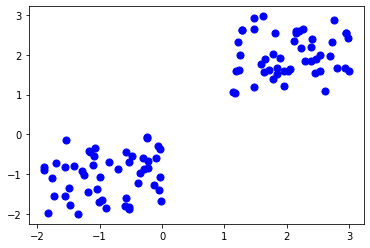

In [33]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [37]:
print(X)

[[-1.0950662  -0.53298187]
 [-0.34829871 -0.9573979 ]
 [-1.03952946 -1.36312213]
 [-0.30228252 -0.59555324]
 [-1.47123288 -1.76121326]
 [-0.90147905 -1.85637972]
 [-1.88605624 -0.8170436 ]
 [-1.00080346 -1.05997755]
 [-1.10119293 -0.76535874]
 [-1.15663137 -0.43203639]
 [-1.49720301 -1.34024734]
 [-0.24431029 -0.06244654]
 [-1.00821053 -1.70390446]
 [-1.73848531 -1.55102613]
 [-0.52816142 -0.69868182]
 [-1.24623946 -1.00600989]
 [-0.04754764 -1.40153058]
 [-0.23488606 -0.08183227]
 [-0.96698843 -1.645394  ]
 [-1.34466889 -1.9925702 ]
 [-1.08264837 -0.32888566]
 [-1.41779314 -0.78999089]
 [-0.06253965 -0.29230347]
 [-0.22450559 -0.84379049]
 [-1.76593866 -1.10421254]
 [-1.18313084 -1.4310816 ]
 [-0.57220093 -0.44506124]
 [-0.28369401 -0.85953012]
 [-1.56207639 -1.53454696]
 [-0.03742545 -1.05509011]
 [-1.28144579 -0.91274869]
 [-0.58783444 -1.78285672]
 [-0.01724389 -1.6759235 ]
 [-0.52802822 -1.86725728]
 [-1.89061114 -0.8795131 ]
 [-0.8438549  -0.69399645]
 [-1.54127346 -0.1507409 ]
 

In [35]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

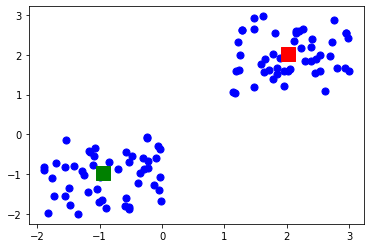

In [36]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()